# Machine Learning Project - Work through Example
## Chapter 2 of Hands On ML with Scikit-learn, Keras and TensorFlow

This notebook is a checklist for a machine learning project. It is based on the [Hands On ML with Scikit-learn, Keras and TensorFlow](https://learning-oreilly-com.ezproxy.uwe.ac.uk/library/view/hands-on-machine-learning/9781098125967/app01.html#idm45720157814960) blog post.



This checklist can guide you through your machine learning projects. There are eight main steps:

1. Frame the problem and look at the big picture.

2. Get the data.

3. Explore the data to gain insights.

4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.

5. Explore many different models and shortlist the best ones.

6. Fine-tune your models and combine them into a great solution.

7. Present your solution.



8. Launch, monitor, and maintain your system.





## Frame the Problem and Look at the Big Picture

1. Define the objective in business terms.

Prediction of the median house value in a given district which will be fed into another ML system, along with many other signals.   

2. How will your solution be used?

Fed into other ML systems and used to determine whether or not to invest in a given area.

3. What are the current solutions/workarounds (if any)?

Manually by experts using complex rules.

4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

Supervised, batch learning, univariate multiple regression.

5. How should performance be measured?

`RMSE` (root mean squared error) or `MAE` (mean absolute error).
`RMSE` is more sensitive to outliers than `MAE`.  It gives more weight to large errors.


$RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2}$

* m is the number of instances in the dataset you are measuring the RMSE on.
* x(i) is the feature vector of the ith instance in the dataset.
* y(i) is the label of the ith instance.
* X is the matrix containing all the feature vectors of the instances in the dataset. There is one row per instance and the i^th row is equal to the transpose of $x^(i)$, noted $x^(i)^T$.
* h is system's prediction function - hypothesis.  It takes a feature vector x and outputs a predicted value $\hat{y}$.
* RMSE(X, h) is the cost function measured on the set of examples using the hypothesis h and the RMSE performance measure.

`MAE` is the mean of the absolute value of the errors and may be considered if there are many outliers.

$MAE(X, h) = \frac{1}{m} \sum_{i=1}^{m} |h(x^{(i)}) - y^{(i)}|$

Both RMSE and MAE are cost functions, since they measure the cost of the system's predictions on the set of examples.  The lower the cost, the better the system's predictions. They are ways to measure distance between two vectors - vector of predictions and vector of target values.  Various distance measures, or *norms* are possible: 

* Computing root of sum of squares (RMSE) is equivalent to computing the *Euclidean norm* of the difference vector.  Also called the $l_2$ norm, noted $||\cdot||_2$.
* Computing the sum of absolutes (MAE) is equivalent to computing the *Manhattan norm* of the difference vector.  Also called the $l_1$ norm, noted $||\cdot||_1$.
* More generally, the $l_k$ norm of a vector $\mathbf{v}$ is defined as $||\mathbf{v}||_k = (\sum_{i=1}^{n} |v_i|^k)^{1/k}$. The $l_0$ norm is the number of non-zero elements in the vector.  The $l_\infty$ norm is the maximum absolute value of the vector elements.  

The higher the norm index, the more it focuses on large values and neglects small ones.  This is why RMSE is more sensitive to outliers than the MAE, but when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

1. Is the performance measure aligned with the business objective?
2. What would be the minimum performance needed to reach the business objective?
3. What are comparable problems? Can you reuse experience or tools?
4.  Is human expertise available?
5.  How would you solve the problem manually?
6.  List the assumptions you (or others) have made so far.

For example, will the downstream ML need to be able to interpret the results?  If so, is the result interpretable?  If not, is the result accurate enough?  If not, is the training data sufficient?  If not, is the performance measure appropriate?  If not, is the solution "good enough" for now?  If not, how would you define "good enough"?  Does it need categories ('cheap', 'medium', 'expensive') rather than a continuous value?  If so, how would you define the categories?  If not, how would you define the threshold for 'expensive'?

7.  Verify assumptions if possible.

Need actual prices, not categories...so good to go!
    


In [1]:
import sys

assert sys.version_info >= (3, 7)


In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the Data
Note: automate as much as possible so you can easily get fresh data.

1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).



In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# extra code – code to save the figures as high-res PNGs 

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
    


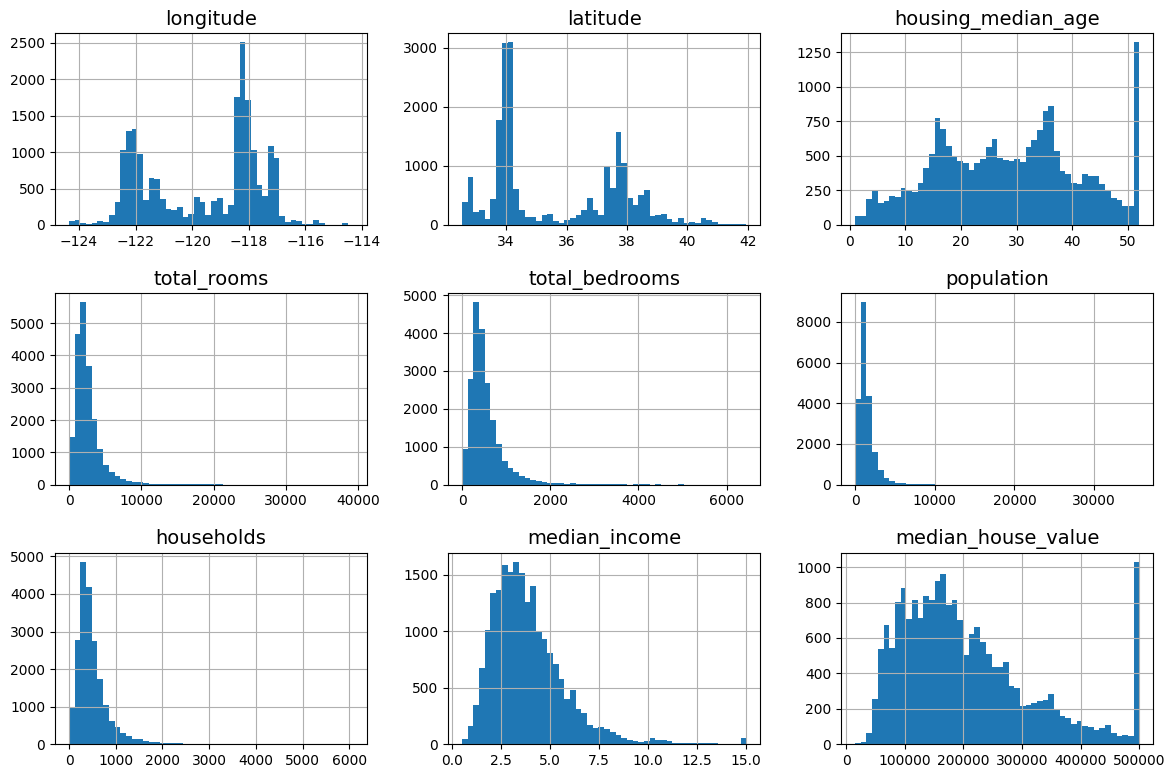

In [9]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

### Observations

* Median income is not in USD.  Need to convert to USD. (Roughly 10K dollars - i.e. 3 = 30K USD). Capped at 15
* Housing median age and median house value were capped.  Need to find out why and if it's a problem. If precise predictions are needed (above $500K), then need to collect proper labels for the districts whose labels were capped, or remove those districts from the training set (and test set).
* Attributes have very different scales
* Many histogramss are skewed right - could make it more difficult for ML algorithms to detect patterns.  Need to transform these attributes to have more bell-shaped distributions.

### Create test set

* *Data snooping* bias - when you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected.  To avoid this, it's important to use a test set only at the very end of your project, once you have a classifier that you are ready to launch.  Therefore you need to put aside a test set right at the start, before any decisions have been made as you may inadvertently find patterns in the test set that will lead you to select a particular kind of model that will not generalize well.

In [10]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set))
print(len(test_set))


16512
4128


Above works but it will be different next time it is run.  One solution is to generate a random seed and calling `np.random.seed(seed)` before calling `np.random.permutation()`.  This will ensure that the same test set will be generated each time.  However, if you run the program again, it will generate a different test set.  Over time, you will get to see the whole dataset, which is what you want to avoid.  One solution is to save the test set on the first run and then load it in subsequent runs.  Another option is to use each instance's identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier).  For example, you could compute a hash of each instance's identifier and put that instance in the test set if the hash is lower or equal to 20% of the maximum hash value.  This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.  New instances will be appended to the end of the dataset, so it will be necessary to generate a new test set, but it will contain 20% of the new instances, and it will not contain any instance that was previously in the training set.

In [12]:
#seed
np.random.seed(42)

In [13]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

simple way of adding index - `df_with_id = housing.reset_index()`

but new data must be appended to the end of the dataset and no row can ever get deleted.  If this is not possible, then a unique id can be generated - using themost stable feature.  In this dataset, lat/long will achieve this.

In [14]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

sci-kit learn has several functions to split datasets into multiple subsets.  The simplest is `train_test_split()`.  It allows adding a random generator seed and yu can pass mulitple datasets with an identical number of rows, and it will split them on the same indices.

This is fine for large datasets of purely random sampling.  If not, then there is a risk of sampling bias.  

This function does not guarantee that all cross-validation folds will be similar, which is generally what you want.  If you want stratified sampling based on an attribute, you can use `StratifiedShuffleSplit()` - the population is divided into homogeneous subgroups called *strata* and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. 

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
test_set["total_bedrooms"].isnull().sum()

44

Scenario - we speak with experts and they tell us that median income is a very important attribute to predict median housing prices. We want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, we first need to create an income category attribute.

Above histogram - there is clustering around 1.5 to 6 (15K-60K).  Need sufficient number of instances in dataset for each stratum.  Not too many strata; each stratum large enough.  The following code uses the `pd.cut()` function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than \$15,000), category 2 from 1.5 to 3, and so on:



In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

Text(0, 0.5, 'Number of districts')

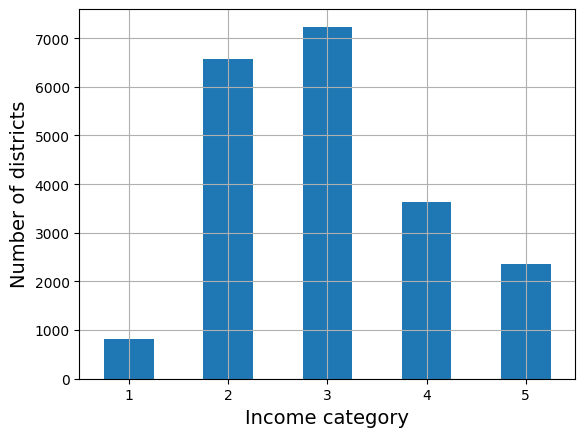

In [19]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

scikit-learn provides a number of splitter classes in the `sklearn.model_selection` package.  Each as a `split()` method that returns an iterator over different training/test splits of the same data.  `split()` method yields the training and test *indices*, not the data itself.  This is useful for cross-validation, where you want to train on one fold and test on another fold.  The following code uses the `StratifiedShuffleSplit` class to split the dataset into 10 distinct subsets called *folds*, each containing 20% of the rows.  Each split generates a pair of indices for the training and test sets.  The following code iterates over the 10 splits and prints the indices of the training and test sets for each iteration:

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

using first split only:

In [21]:
strat_train_set, strat_test_set = strat_splits[0]

shorter way to get single split : 

In [22]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

income category proportions in the test set:

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

comparison - almost identical between full and stratified sampling.  however, the random sampling approach is skewed. 

In [24]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


not using income category, so dropping it

In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore the Data
Note: try to get insights from a field expert for these steps.

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:

   * Name
   * Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
   * % of missing values
   * Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
   * Usefulness for the task
   * Type of distribution (Gaussian, uniform, logarithmic, etc.)
  
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data”).
10. Document what you have learned.


### Explore

put test set aside; only explore training set.  If training set is very large, sample an exploration set to make manipulations easy and fast.  

this set is quite small, so working directly on full set.  

copy to avoid damage.

In [175]:
housing = strat_train_set.copy()

### Visualise

scatterplot the geographical information (long, lat) 
looks like california.



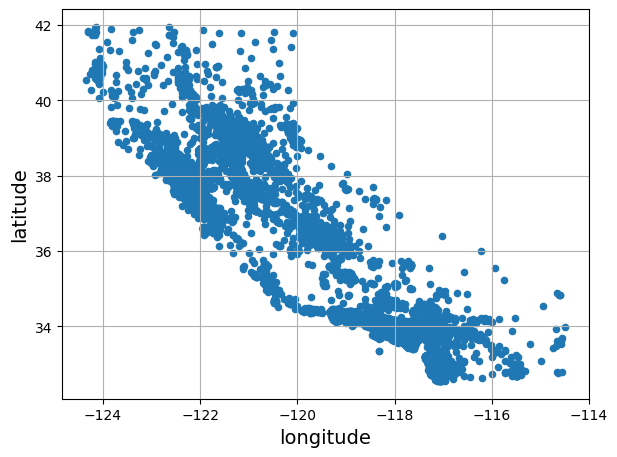

In [176]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

set alpha to 0.2 to see high density areas better

can clearly see high-density areas - Bay Area, San Diego, Central Vally (Sacremento, Fresno)

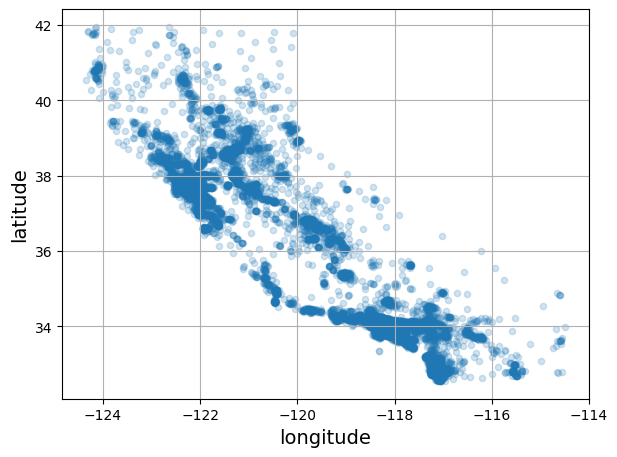

In [177]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

look at housing prices.  radius of each circle represents district's population (option s), and color represents price (option c).  use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).

image shows that housing prices are related to the location (close to ocean) and pop density.  clustering algorithm may be useful to detect the main cluster and adding new features that measure the proximity to the cluster centres.

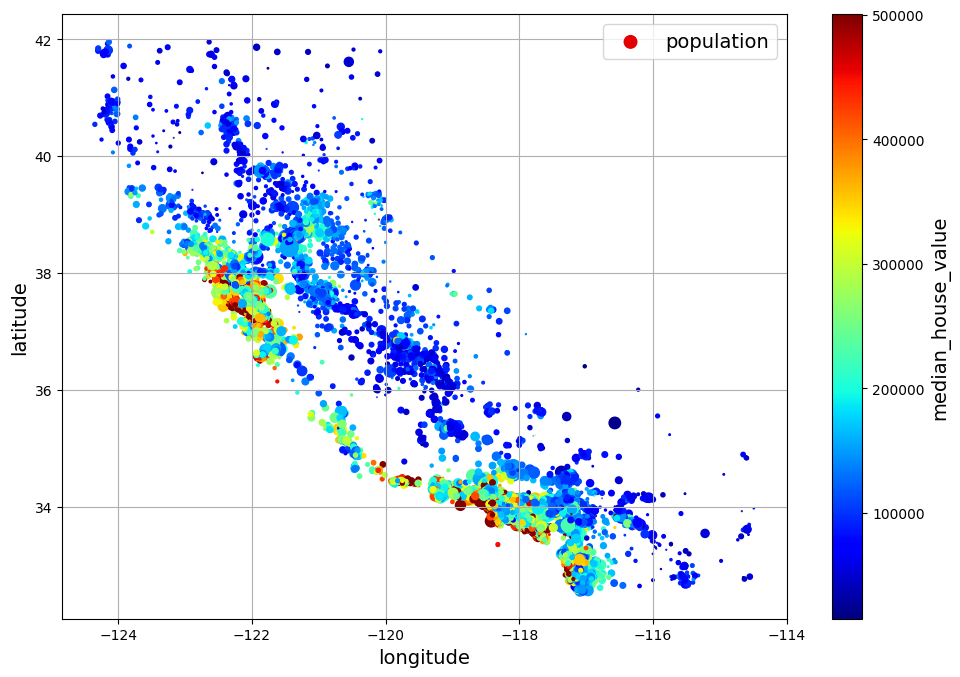

In [96]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

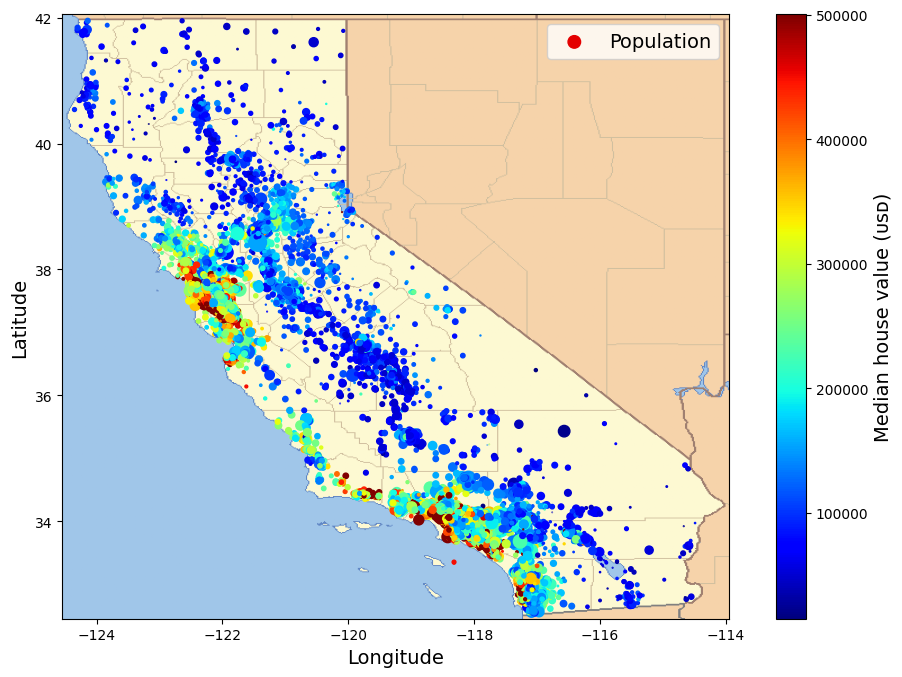

In [178]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

### correlations

dataset is not too large, so compute standard correlatoin coefficent (Pearson's r) between every pair of attributes using corr()

In [179]:
corr_matrix = housing.corr()

C:\Users\zoona\AppData\Local\Temp\ipykernel_18444\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


look at each attribute's correlation with the median house value
1 - strong positive
-1 - strong negative
0 - no linear correlation

In [180]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

can use scatter_matrix() (pandas) which plots every numerical attribute against every other numerical attribute - $11^2 = 121$ plots.  This would be too many plots to look at, so let's focus on a few promising attributes that seem most correlated with the median housing value.

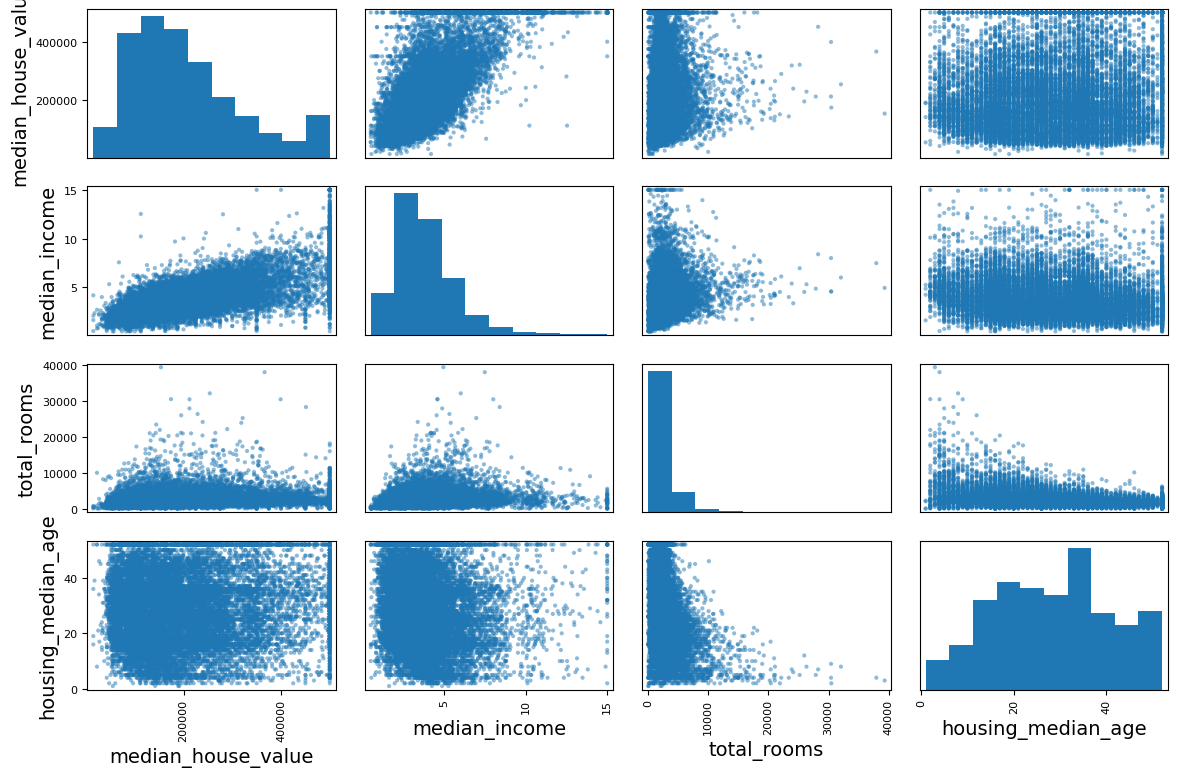

In [181]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

where plotting against itself, histogram is shown.

median income seems the most promising attribute to predict median house vlaue, zooming in on their correlation scatterplot.

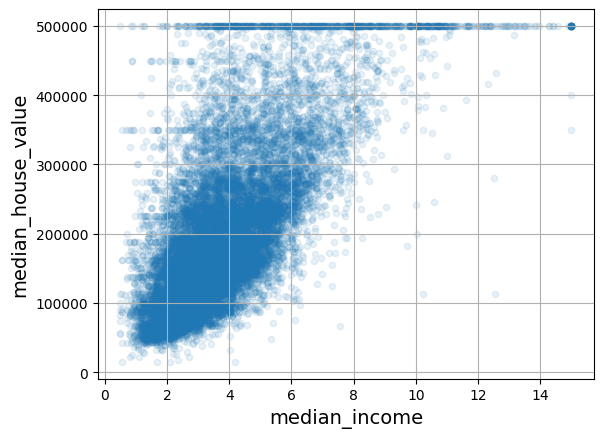

In [182]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
#save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

plot shows: 
1. correlation is quite strong - clearly see upward trend and points not too dispersed
2. prie cap is clearly visible as horizontal line at 500K
3. Plot also revelas other less obvious straight lines - around 450K, 350K, 280 and a few more.

Many want to remove the corresponding districts to prevent the algorithm from learning to reproduce these data quirks.

this only shows linear correlation - any non-linear relationship is not captured.  Need to try out attribute combinations.

Some ideas to explore data and insights
Identified data quirks which may want to clean up
Correlations between attributes - esp. target attribute
Some attributes have a skewwed-right distribution - may want to transform them (e.g. log(x))
May want to try attribute combinations - e.g. total rooms in a district is not very useful if you don't know how many households there are - really want the number of rooms per household.  Similarly, total bedrooms is not useful - want to compare it to number of rooms.  And populatin per household seems like an interesting attribute combination.

In [183]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [184]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\zoona\AppData\Local\Temp\ipykernel_18444\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

bedrooms_ratio is much more correlated with median house value than total number of rooms or bedrooms.  Houses with a lower bedoom/room ratio tend to be more expensive.  The number of rooms per household is also more informative than the total number of rooms in a district - obviously the larger the houses, the more expensive they are.

Exploration does not need to be absolutely thorough - mainly to start off with quick insights to get a a reasonably good prototype.  It is an interative process - up and running, analyse output, gain insights and come back to explore more.


## Prepare the Data
Notes:

* Work on copies of the data (keep the original dataset intact).

* Write functions for all data transformations you apply, for five reasons:

  * So you can easily prepare the data the next time you get a fresh dataset
  * So you can apply these transformations in future projects
  * To clean and prepare the test set
  * To clean and prepare new data instances once your solution is live
  * To make it easy to treat your preparation choices as hyperparameters

1. Clean the data:

   * Fix or remove outliers (optional).

   * Fill in missing values (e.g., with zero, mean, median…​) or drop their rows (or columns).

2. Perform feature selection (optional):

   * Drop the attributes that provide no useful information for the task.

3. Perform feature engineering, where appropriate:

   * Discretize continuous features.

   * Decompose features (e.g., categorical, date/time, etc.).

   * Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).

   * Aggregate features into promising new features.

4. Perform feature scaling:

   * Standardize or normalize features.


copy the training set for exploration, so you can play with it without harming the training set.

In [185]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

Most ML algorithms cannot work with missing features, so we can create functions to fix this.  `total_bedrooms` attribute has missing values.  We have three options:
1. Get rid of the corresponding districts
2. Get rid of the whole attribute
3. Set the values to some value (zero, the mean, the median, etc.) - this is called imputation

Use Pandas: `dropna()`, `drop()`, `fillna()`

In [105]:
#housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

#housing.drop("total_bedrooms", axis=1)       # option 2

#median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
#housing_option1 = housing.copy()

#housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

#housing_option1.loc[null_rows_idx].head()

Decide for option 3 -> SciKit-Learn: `SimpleImputer` which stores median value of each feature making it possible to impute missing values not only on the training set, but also on the validation set, the test set and any new data fed to the model. 

First need to create a `SimpleImputer` instance, specifying that you want to replace each attribute's missing values with the median of that attribute.  Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity.

In [186]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])

Fit the `imputer` instance to the training data using fit() method.  The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.   

Only `total_bedrooms` had missing values, but safest to use `imputer` on all numerical attributes.

In [187]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [188]:
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

We can use the 'trained' `imputer` to transform the training set by replacing missing values by the learned medians:

In [189]:
X = imputer.transform(housing_num)

In [190]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

Missing values can also be replaced with the mean value (`strategy = "mean"`) or the most frequent value (`strategy = "most_frequent"`) or with a constant value (`strategy = "constant", fill_value = 0`).  The last two support non-numerical attributes.

Note: 

There are more powerful imputers in sklearn.impute, such as `KNNImputer`, which can impute missing values using the weighted or unweighted mean of the desired number of nearest neighbors and `IterativeImputer`, which can impute missing values by modeling each feature with missing values as a function of other features, and then use that estimate for imputation (regression model).

SciKit-Learn design: 

Estimators - any object that can estimate some parameter based on a dataset.  Estimator's `fit()` method takes a dataset (e.g. a 2D array) and estimates some parameters based on the data (or two for supervised learning).  It returns the object itself, so the method can be chained.  E.g. `imputer.fit(housing)` returns an `Imputer` object, which is stored in `imputer` variable.  Parameters needed to guide the estimation is considered a hyperparameter (such as `SimpleImputer's strategy`)

Transformers - some estimators (such as an `SimpleImputer`) can also transform a dataset.  These are called transformers.  The transformation is performed by the `transform()` method with the fit() method.  It takes input and returns output based on the learning from fit().  It also has a convenience function called `fit_transform()` which fits and then transforms.

Predictors - some estimators are capable of making predictions given a dataset, for example `LinearRegression`.  They have a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions.  They also have a `score()` method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms).

Inspection - all the estimator's hyperparameters are accessible directly via public instance variables (e.g. `imputer.strategy`), and all the estimator's learned parameters are also accessible via public instance variables with an underscore suffix (e.g. `imputer.statistics_`).

Non-proliferation of classes - Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes.  Hyperparameters are just regular Python strings or numbers.

Composition - existing building blocks are reused as much as possible.  For example, it is easy to create a `Pipeline` of transformations from the data to a prediction.

Sensible defaults - SciKit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.

SciKit-Learn transformers output NumPy arrays even if they are fed Pandas dataframes.  So output will not have column names or row indices.  This can be reocvered by using `DataFrameSelector` transformer.

Wrapping X in a dataframe and recover column names and index from housing_num:

In [191]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

### Handling Text and Categorical Attributes

In dataset, only `ocean_proximity` is a text attribute.  Most ML algorithms prefer to work with numbers, so we need to convert these text labels to numbers.

In [192]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Convert with `OriginalEncoder` class.  This is a transformer, so it needs to implement `fit()` and `transform()` methods.  `fit()` method returns self, and `transform()` method returns a NumPy array.

In [193]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [194]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

Get list of categories using `categories_` instance variable.  This is a list containing a 1D array of categories for each categorical attribute.  In this case, there is only one categorical attribute, so it is a list containing a single array.  This array contains a list of categories (in this case, the list of ocean_proximity categories).

In [195]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this represenation is that ML algos will assume that two nearby values are more similar than two distant values.  This may be fine in some cases (e.g. for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).  

To fix this, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on.  This is called `one-hot encoding`, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).  The new attributes are sometimes called dummy attributes.

SciKit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors.  It can handle text and numerical categories.  It can also handle categorical inputs in any order (e.g. “INLAND” = 1, “<1H OCEAN” = 0).  By default, it returns a sparse array, but we can set `sparse = False` to get a dense array instead.

In [196]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [197]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

A sparse matrix is a very efficient representation for matrices that contain mostly zeros.  (It only stores nonzero values and their positions.)  If you want to convert a sparse matrix to a (dense) NumPy array, just call the `toarray()` method.

In [198]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

As with `OriginalEncoder` you can get the list of categories using the `categories_` instance variable.  It is a list containing a 1D array of categories for each categorical attribute.  In this case, there is only one categorical attribute, so it is a list containing a single array.  This array contains a list of categories (in this case, the list of ocean_proximity categories).

In [199]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [200]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has a function called `get_dummies()` for one-hot encoding.

In [201]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [202]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [203]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


The advantage of `OneHotEncoder` is that it remembers which categories itwas trained on.  This is important because once the model is in production, it should be fed exactly the same features as during training.

`OneHotEncoder` detects unknown categories during transform() and returns an error by default.  You can set `handle_unknown = "ignore"` to ignore unknown categories - it will represent them with zeros. This is useful if you have a category in the test set that was not present in the training set.

Tip:

If categorical attribute has a large number of possible categories, then one-hot encoding will result in a large number of input features.  This may slow down training and degrade performance.  In this case, you can replace the categorical input with useful numerical features that represent the categories (e.g. population density, median income, etc.).  Alternatively, you can replace each category with a learnable, low-dimensional vector called an embedding.  Each category’s representation will be learned during training.  This is called `embedding`.

When fitting any Scikit-Learn estimator using a dataframe, the estimator stores the column names in the `feature_names_in_` attribute.  Scikit-Learn ensures that any dataframes passed to the `transform()` or `predict()` methods have the same column names as the dataframe passed to the `fit()` method.  This is very useful for debugging.  Transformers also have a `get_feature_names()` method that returns the list of feature names.

In [204]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [205]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [206]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [207]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [208]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


### Feature Scaling and Transformation

ML algos do not perform well when the input numerical attributes have very different scales.  This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15.  We need to apply feature scaling.

Two common ways to get all attributes to have the same scale: *min-max* scaling and *standardization*.

Warning: Scikit-Learn does not automatically apply feature scaling to your data.  You must apply it yourself.

As with all estimators, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).  Only then can you use them to transform the training set and the test set (and new data).  Note that while the training set values will always be scaled to the specified range, if new data contains outliers, they may be scaled outside the range.  If you want to avoid this, just set the `clip` hyperparameter to `True` (it is `False` by default).

Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.  We do this by subtracting the min value and dividing by the max minus the min.  Scikit-Learn provides a transformer called `MinMaxScaler` for this.  It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1. (Neural networks work best with zero-mean inputs, so you may want to set the range to -1 to 1.)

In [209]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Standardization is different - first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so that the resulting distribution has unit variance, SD = 1).  

Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g. neural networks often expect an input value ranging from 0 to 1).  However, standardization is much less affected by outliers.  For example, suppose a district had a median income equal to 100 (by mistake), instead of 0-15.  Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected.  Scikit-Learn provides a transformer called `StandardScaler` for standardization.

In [210]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

Tip: If you want to scale a sparse matrix without converting it to a dense matrix first, you can use a `StandardScaler` with its `with_mean=False` hyperparameter option. (It will only divide the data by the SD, without subtracting the mean.) 

This is useful if you have a lot of training data and you want to scale it online (e.g., as part of a `Pipeline`).

Heavy tails (when values far from mean are not exponentially rare), both min-max scaling and standardization will squash most values into a small range.  ML models tend to perform better when input numerical attributes have a *normal* distribution (bell-shaped, symmetrical, with the mean, median, and mode roughly equal).

When a feature's distribution has a long tail, it is often useful to transform it with a *power transformation*, such as computing a *logarithm* (log(x)) or a *reciprocal* (1/x).  This is useful for reducing skewness.  

Scikit-Learn provides a transformer called `PowerTransformer` to apply power transformations.  It can automatically detect whether to apply a log or reciprocal transformation, and it can also apply different transformations to each feature.

For example, the `population` feature roughly follows the power law: districts with 10,000 inhabitants are only 10 times less frequent than districts with 1000 inhabitants, not exponentially less frequent.  


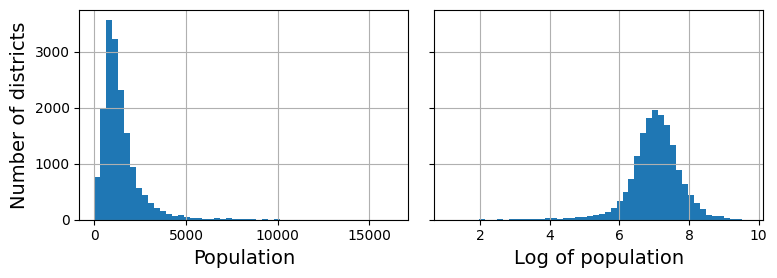

In [211]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

Another approach is *bucketize* the feature - chopping its distribution into roughly equal sized buckets and replacing each feature value with the index of the buck it belongs to, much like we did to create `income_cat` feature.  For example, you could replace each value with its percentile.  Bucketizing with equal-sized buckets results in almost uniform distribution, so no need for further scaling. Scikit-Learn provides a `KBinsDiscretizer` class to perform bucketization.

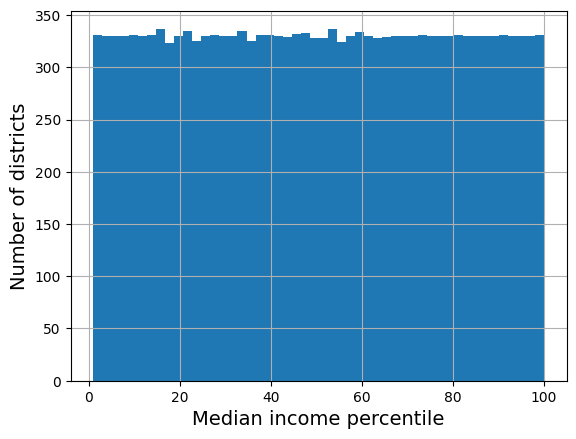

In [212]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

WHen a feature has a multimodal distribution (two or more clear peaks, called modes) such as `housing_median_age`, it can be helpful to bucketize it but this time treating the bucket IDs as categories rather than numbers.  Therefore bucket indices need to be encoded, for example using a `OneHotEncoder`.  THis approach will allow the regression model to more easily learn different rules for different ranges of this feature value.  

Another appraoch is to add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode.  The simlarity measure is typically computed using a *radial basis function* (RBF) - any function that depends only on the distance between teh input value and a fixed point.  The most common RBF is the *Gaussian RBF* (also called *Gaussian kernel*), whose output value decays exponentially as the input value moves away from the fixed point.  The Gaussian RBF is given by the following equation: 

$$\phi_{\gamma}(\mathbf{x}, \ell) = \exp(-\gamma ||\mathbf{x} - \ell||^2)$$

where $\gamma$ is the *kernel bandwidth* (a hyperparameter), $\mathbf{x}$ is the input value, and $\ell$ is the fixed point.  The Gaussian RBF is also called the *Gaussian kernel*.



In [213]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

figure below shows the new feature as a function of the housing median age (solid line).  It also shows what the feature would look like fi you used a smaller `gamma` value.  The chart shows, the new age similarity feature peaks at 35, right around the spike in the housing median age distribution: if this particular age group is well correlated with lower prices, there's a good chance that this new feature will help. 

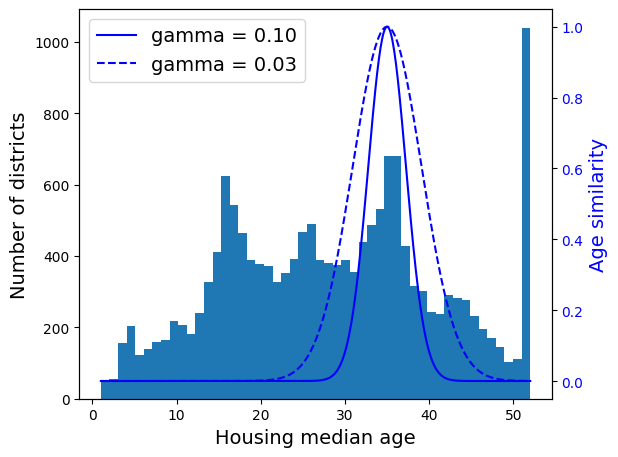

In [214]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

Target values may also need to be transformed.  For example, if the target distribution has a heavy tail, you may need to replace the target with its logarithm.  But if you do, the regression model will now predict the log of the median house value, not the median house value itself.  So you need to apply the inverse function to get the result.  This is called *logarithmic loss*.

Most Scikit-Learn transformers have an `inverse_transform()` method.  

In [215]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

A simpler option is to use a `TransformedTargetRegressor` - we just need to construct it, give it the regression model and the label transformer, then fit it on the training set, using the original unscaled labels.  

It will automatically use the transformer to scale the labels and train the regression model on the resulting scaled labels, just like we did earlier.  Wehn we want to make a prediction, it will call the regression model's `predict()` method, and then apply the inverse transform to the result to get the unscaled prediction.  This is a very convenient way to train a model on a transformed target value.

In [216]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

#### Custom Transformers 

Useful to create functions which take NumPy arrays as input and return NumPy arrays as output for common transformations.  This will allow you to use them in Scikit-Learn pipelines.  For example, it is often useful to transform features with heavy-tailed distributions by replacing them with logarithm (assuming feature is positive and tail is on the right).  



In [217]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

`inverse_func` is optional - allows to specify inverse transform function, if you plan to use transformer in a `TransformedTargetRegressor`

Transformation function can take hyperparameters as additional arguments.  

Example - create a transformer that computes the same Gaussian RBG similarity measure as before. 

In [218]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [219]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

Theres no inverse function for the RBF kernel since there are always two values at a given distance from a fixed point (except at 0).  `rbf_kernel()` does not treat the features separately - if you pass it an array with two features, it will measure the 2D distance (Euclidean) to measure similarity. 

For example, adding a feature that will measure the geographic similarity between each district and San Francisco: 

In [220]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [221]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

Cn also use custom transformers to combine features.  For example, `FunctionTransformer` below computes the ratio between input features 0 and 1: 

In [222]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

This is useful, but to make the transformer trainable and able to learn parameters in the fit() method to be used later in the transform() method - you need to write a custom class.  

fit() - returns self, so that it can be chained with other methods
transform() - returns the transformed data
fit_transform() - calls fit() and transform() in sequence

If you add `TransformerMixin` as a base class, you will get `fit_transform()` for free.  If you add `BaseEstimator` as a base class (and avoid `*args` and `**kargs` in your constructor), you will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

Here's a custom transformer which acts like the `StandardScaler`: 

In [223]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

To note: 

* `sklearn.utils.validation` contains several functions which can be used to validate the inputs.  
* Scikit-Learn pipelines require the `fit()` method to have two arguments `X` and `y` (except for the last step, which can have only `X`).  This is why we need to add `y=None` to the `fit()` method.  If we did not, we would get an error when we try to fit the pipeline.  The `fit_transform()` method will be called with the correct arguments, so we do not need to worry about that.
* All Scikit-Learn estimators set `n_features_in_` in the `fit()` method and ensure that data passed to `transform()` or `predict()` has this number of features
* `fit()` must return `self` so that it can be chained with other methods.  
* This implementation is not 100% complete - all estimators should set `feature_names_in_` in the `fit()` method when they are passed a DataFrame.  All transofrmers should provide a `get_features_` method when their transformation is reversed.  

The following code demonstrates custom transformer that uses a `KMeans` clusterer in the `fit()` method to identify the main clusters in teh training data and then uses `rbf_kernel()` in the `transform()` method to measure how similar each sample is to each cluster centre: 

In [224]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

You can check whether your custom estimator respects Scikit-Learn’s API by passing an instance to check_estimator() from the sklearn.utils.estimator_checks package. For the full API, check out https://scikit-learn.org/stable/developers.

k-means is a clustering algorithm that locates clusters in the data. How many it searches for is controlled by the n_clusters hyperparameter. After training, the cluster centers are available via the cluster_centers_ attribute. The fit() method of KMeans supports an optional argument sample_weight, which lets the user specify the relative weights of the samples. k-means is a stochastic algorithm, meaning that it relies on randomness to locate the clusters, so if you want reproducible results, you must set the random_state parameter. As you can see, despite the complexity of the task, the code is fairly straightforward. Now let’s use this custom transformer:

In [225]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This code creates a ClusterSimilarity transformer, setting the number of clusters to 10. 

Then it calls fit_transform() with the latitude and longitude of every district in the training set, weighting each district by its median house value. 

The transformer uses k-means to locate the clusters, then measures the Gaussian RBF similarity between each district and all 10 cluster centers. The result is a matrix with one row per district, and one column per cluster. 

Let’s look at the first three rows, rounding to two decimal places:

In [226]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

Figure below shows the 10 clusters found by k-means.

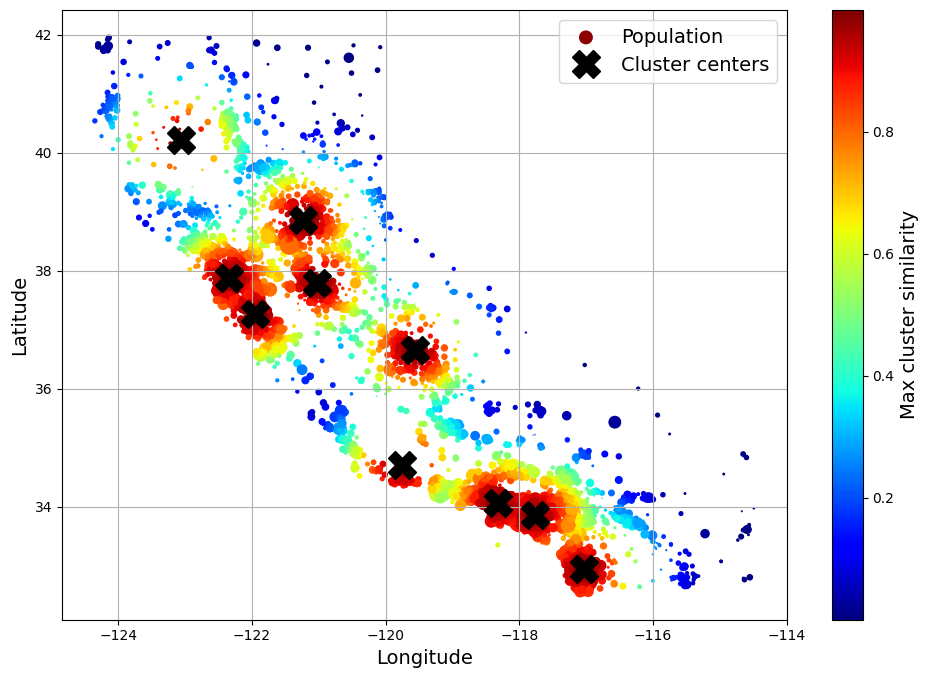

In [227]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

Scikit-Learn provides `Pipeline` class to help with sequences of transformations.  

Here's a small pipeline for the numerical attributes:

In [228]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [229]:
import sklearn
sklearn.set_config(display='diagram')
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

`Pipeline` constructor takes a list of name/estimator pairs (2-tuples) defining a sequence of steps.  (can have any name, but must be unique and not contain __ double underscores).  All but the last estimator must be transformers (i.e. must have a `fit_transform()` method).  

When you call the pipeline's `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the `fit()` method.

If you import `sklearn` and run `sklearn.set_config(display='diagram')`, you will get a nice diagram of the pipeline.

Can use `make_pipeline()` to create a pipeline from a list of estimators.  It will automatically name the steps based on their type.  For example, the following code creates a pipeline equivalent to the one we just built:

In [230]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [231]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [232]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

To recover a nice dataframe, use `get_feature_names_out()` method.  This will return a list containing the names of the transformed features.  You can then use this list to create a new dataframe.

In [233]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [234]:
df_housing_num_prepared.head(2)  # extra code

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [235]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [236]:
num_pipeline[1]

StandardScaler()

In [237]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [238]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [239]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Pipelines support indexing; for example, `pipeline[1]` returns the second estimator in the pipeline, and `pipeline[:-1]` returns a Pipeline object containing all but the last estimator. 

You can also access the estimators via the steps attribute, which is a list of name/estimator pairs, or via the named_steps dictionary attribute, which maps the names to the estimators. For example, `num_pipeline["simpleimputer"]` returns the estimator named `"simpleimputer"`.

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer capable of handling all columns, applying the appropriate transformations to each column. 

For this, you can use a `ColumnTransformer.` For example, the following `ColumnTransformer` will apply `num_pipeline` (the one we just defined) to the numerical attributes and cat_pipeline to the categorical attribute:

In [240]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

First we import the `ColumnTransformer` class, then we define the list of numerical and categorical column names and construct a simple pipeline for categorical attributes. 

Lastly, we construct a `ColumnTransformer`. Its constructor requires a list of triplets (3-tuples), each containing a name (which must be unique and not contain double underscores), a transformer, and a list of names (or indices) of columns that the transformer should be applied to.

````
TIP

Instead of using a transformer, you can specify the string "drop" if you want the columns to be dropped, or you can specify "passthrough" if you want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but you can set the remainder hyperparameter to any transformer (or to "passthrough") if you want these columns to be handled differently.
````

Since listing all the column names is not very convenient, Scikit-Learn provides a `make_column_selector()` function that returns a selector function you can use to automatically select all the features of a given type, such as numerical or categorical. 

You can pass this selector function to the `ColumnTransformer` instead of column names or indices. Moreover, if you don’t care about naming the transformers, you can use `make_column_transformer()`, which chooses the names for you, just like `make_pipeline()` does. 

For example, the following code creates the same `ColumnTransformer` as earlier, except the transformers are automatically named "pipeline-1" and "pipeline-2" instead of "num" and "cat":

In [241]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [242]:
housing_prepared = preprocessing.fit_transform(housing)

We have a preprocessing pipelines that takes the entire dataset and applies each transformer to the appropriate columns, then concatenates the outputs along the second axis (the transformers must return the same number of rows)..

It returns a NumPy array but you can get the column names using `preprocessing.get_feature_names_out()`.

In [243]:
# extra code – shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


## Summary so far

Pipelines will: 

* Missing values in numerical features will be imputed by replacing them with the median value of that feature.  Most ML algorithms cannot work with missing features, so we need to take care of them.  In categorical features, missing values will be replaced by the most frequent category. 
* The categorical feature will be one-hot encoded, as most ML algorithms prefer to work with numerical values.
* A few ratio features will be computed and added: `bedrooms_ratio`, `rooms_per_house`, `people_per_house`.  Hopefully these will correlate with median house value.
* A few cluster similarity features will also be added.  These will likely be more usefu to the model than lat and long
* Features with a long tail will be replaced by their log as most models prefer uniform or Gaussian distributions.
* All numerical features will be standardized, as most ML algorithms perform better when features are on a similar scale.

In [244]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

If we run this `ColumnTransformer` it performs all transformations and outputs a NumPy array with 24 features: 

In [245]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 24)

In [246]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Ready to Select and Train a Model

Basic linear regression model:



In [247]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000294B7569450>)])),
                ('linearregression', LinearRegression())])

Try it on training set. 

In [248]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([244100., 372200., 128800.,  94800., 328000.])

Compare against actual values

In [249]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

It works, but not well? First prediction is way off.  The others are better. 

Use RMSE to evaluate the model on the training set:



In [250]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.7%, -23.1%, 26.6%, -1.4%, -9.3%


In [251]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68689.09669205968

the median_housing_values of most districts range between $120,000 and $265,000, so a typical prediction error of $68,628 is really not very satisfying. 

This is an example of a model `underfitting` the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 

As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. You could try to add more features, but first you want to try a more complex model to see how it does.

You decide to try a `DecisionTreeRegressor`, as this is a fairly powerful model capable of finding complex nonlinear relationships in the data

In [252]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000294B7569450>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [253]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

No error?!

Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly `overfit` the data. How can you be sure? 


One way to evaluate the decision tree model would be to use the `train_​test_split()` function to split the training set into a smaller `training set` and a `validation set`, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of effort, but nothing too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn’s `k_-fold cross-validation` feature. The following code randomly splits the training set into 10 nonoverlapping subsets called `folds`, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores:

In [254]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [255]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

Now the decision tree doesn’t look as good as it did earlier. In fact, it seems to perform almost as poorly as the linear regression model! 

Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

The decision tree has an RMSE of about 66,868, with a standard deviation of about 2,061. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always feasible.

If you compute the same metric for the linear regression model, you will find that the mean RMSE is 69,858 and the standard deviation is 4,182. So the decision tree model seems to perform very slightly better than the linear model, but the difference is minimal due to severe overfitting. We know there’s an overfitting problem because the training error is low (actually zero) while the validation error is high.

In [ ]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)


In [ ]:
pd.Series(lin_rmses).describe()

Let’s try one last model now: the `RandomForestRegressor`. As you will see in Chapter 7, random forests work by training many decision trees on random subsets of the features, then averaging out their predictions. Such models composed of many other models are called `ensembles`: they are capable of boosting the performance of the underlying model (in this case, decision trees). The code is much the same as earlier:

In [257]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [258]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

Wow, this is much better: random forests really look very promising for this task! 

However, if you train a `RandomForest` and measure the RMSE on the training set, you will find roughly 17,474: that’s much lower, meaning that there’s still quite a lot of overfitting going on. Possible solutions are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. 

Before you dive much deeper into random forests, however, you should try out many other models from various categories of machine learning algorithms (e.g., several support vector machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. 

**The goal is to shortlist a few (two to five) promising models.**

## Fine Tune

Assume a few promising models.  

### Grid Search

you can use Scikit-Learn’s `GridSearchCV` class to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. 

For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [260]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000294B7569450>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

Notice that you can refer to any hyperparameter of any estimator in a pipeline, even if this estimator is nested deep inside several pipelines and column transformers. 

For example, when Scikit-Learn sees "preprocessing__geo__n_clusters", it splits this string at the double underscores, then it looks for an estimator named "preprocessing" in the pipeline and finds the preprocessing ColumnTransformer. 

Next, it looks for a transformer named "geo" inside this `ColumnTransformer` and finds the `ClusterSimilarity` transformer we used on the latitude and longitude attributes. 

Then it finds this transformer’s `n_clusters` hyperparameter. 

Similarly, `random_forest__max_features` refers to the `max_features` hyperparameter of the estimator named "random_forest", which is of course the RandomForest model (the `max_features` hyperparameter will be explained in Chapter 7).

In [261]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose'

TIP
Wrapping preprocessing steps in a Scikit-Learn pipeline allows you to tune the preprocessing hyperparameters along with the model hyperparameters. This is a good thing since they often interact. 

For example, perhaps increasing `n_clusters` requires increasing `max_features` as well. If fitting the pipeline transformers is computationally expensive, you can set the pipeline’s memory hyperparameter to the path of a caching directory: when you first fit the pipeline, Scikit-Learn will save the fitted transformers to this directory. If you then fit the pipeline again with the same hyperparameters, Scikit-Learn will just load the cached transformers

There are two dictionaries in this `param_grid`, so `GridSearchCV` will first evaluate all 3 × 3 = 9 combinations of `n_clusters` and `max_features` hyperparameter values specified in the first dict, then it will try all 2 × 3 = 6 combinations of hyperparameter values in the second dict. 

So in total the grid search will explore 9 + 6 = 15 combinations of hyperparameter values, and it will train the pipeline 3 times per combination, since we are using 3-fold cross validation. 

This means there will be a grand total of 15 × 3 = 45 rounds of training! It may take a while, but when it is done you can get the best combination of parameters like this:

You can access the best estimator using grid_search.best_estimator_. 

If `GridSearchCV` is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. 

This is usually a good idea, since feeding it more data will likely improve its performance.

In [262]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [263]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000029...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000294986E96D0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

The evaluation scores are available using `grid_search.cv_results_`. This is a dictionary, but if you wrap it in a DataFrame you get a nice list of all the test scores for each combination of hyperparameters and for each cross-validation split, as well as the mean test score across all splits:

In [264]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head() # note: the 1st column is the row ID

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43460,43919,44748,44042
13,15,8,44132,44075,45010,44406
14,15,10,44374,44286,45316,44659
7,10,6,44683,44655,45657,44999
9,10,6,44683,44655,45657,44999


The mean test RMSE score for the best model is 44,042, which is better than the score you got earlier using the default hyperparameter values (which was 47,019). 

Congratulations, you have successfully fine-tuned your best model!

## Randomised Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but `RandomizedSearchCV` is often preferable, especially when the hyperparameter search space is large. 

This class can be used in much the same way as the `GridSearchCV` class, but instead of trying out all possible combinations it evaluates a fixed number of combinations, selecting a random value for each hyperparameter at every iteration. 

This may sound surprising, but this approach has several benefits:

* If some of your hyperparameters are continuous (or discrete but with many possible values), and you let randomized search run for, say, 1,000 iterations, then it will explore 1,000 different values for each of these hyperparameters, whereas grid search would only explore the few values you listed for each one.

* Suppose a hyperparameter does not actually make much difference, but you don’t know it yet. If it has 10 possible values and you add it to your grid search, then training will take 10 times longer. But if you add it to a random search, it will not make any difference.

* If there are 6 hyperparameters to explore, each with 10 possible values, then grid search offers no other choice than training the model a million times, whereas random search can always run for any number of iterations you choose.

In [265]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [266]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000294B7583AD0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029498814C50>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [267]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41287,42071,42627,41995
8,32,7,41690,42513,43389,42531
0,41,16,42223,42959,43246,42809
5,42,4,41818,43094,43817,42910
2,23,8,42264,42996,43830,43030


Bonus section: how to choose the sampling distribution for a hyperparameter

* scipy.stats.randint(a, b+1): for hyperparameters with discrete values that range from a to b, and all values in that range seem equally likely.
* scipy.stats.uniform(a, b): this is very similar, but for continuous hyperparameters.
* scipy.stats.geom(1 / scale): for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* scipy.stats.expon(scale): this is the continuous equivalent of geom. Just set scale to the most likely value.
* scipy.stats.loguniform(a, b): when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.

Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for randint(), uniform(), geom() and expon():

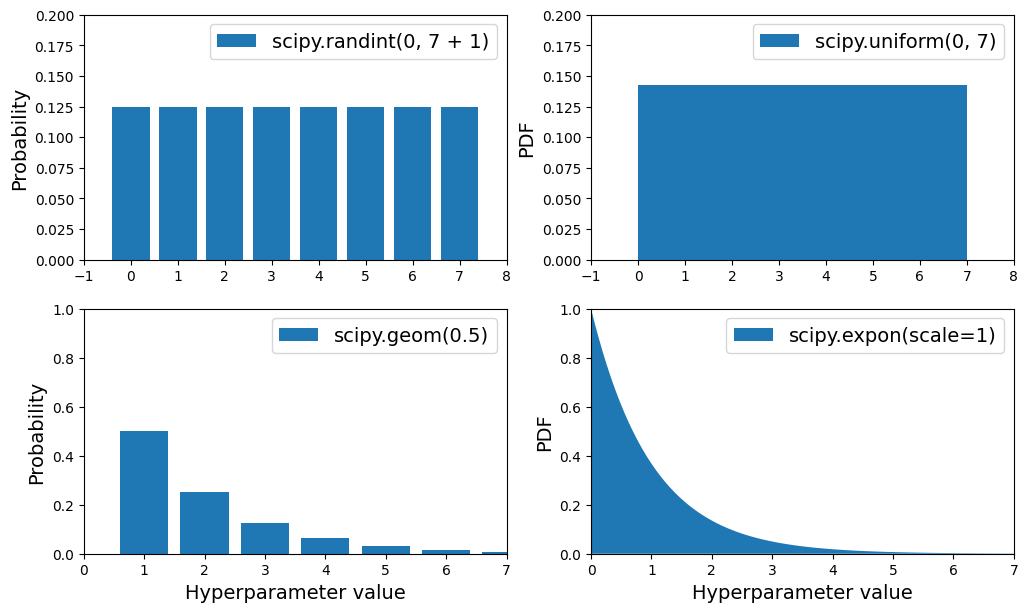

In [268]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for expon() and loguniform() (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter scales. You can see that expon() favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But loguniform() does not favor any scale, they are all equally likely:

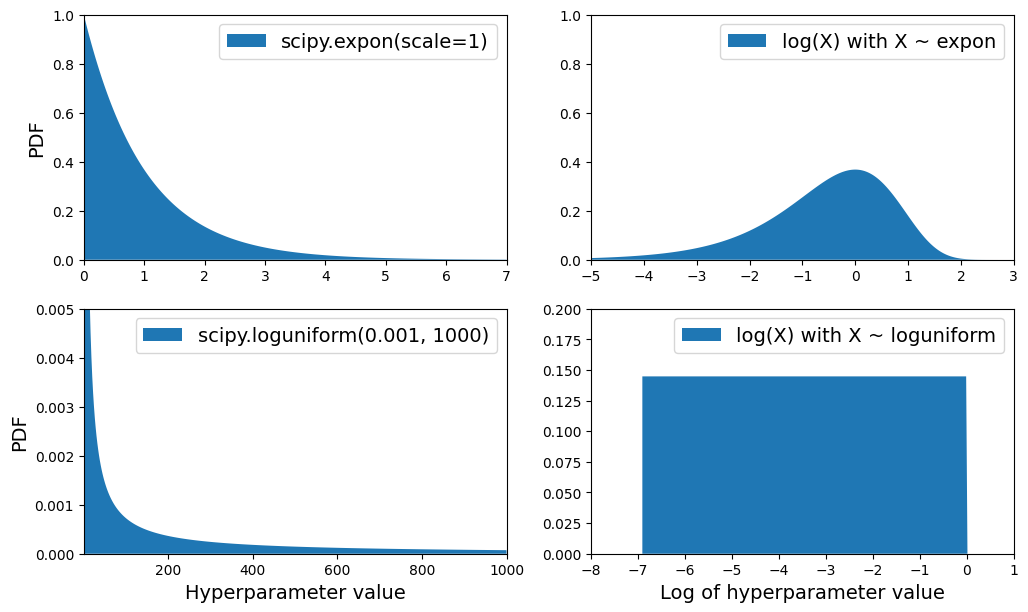

In [269]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

Scikit-Learn also has `HalvingRandomSearchCV` and `HalvingGridSearchCV` hyperparameter search classes. 

Their goal is to use the computational resources more efficiently, either to train faster or to explore a larger hyperparameter space. 

Here’s how they work: in the first round, many hyperparameter combinations (called “candidates”) are generated using either the grid approach or the random approach. These candidates are then used to train models that are evaluated using cross-validation, as usual. 

However, training uses limited resources, which speeds up this first round considerably. By default, “limited resources” means that the models are trained on a small part of the training set. 

However, other limitations are possible, such as reducing the number of training iterations if the model has a hyperparameter to set it. Once every candidate has been evaluated, only the best ones go on to the second round, where they are allowed more resources to compete. After several rounds, the final candidates are evaluated using full resources. This may save you some time tuning hyperparameters.

## Ensemble Methods


Another way to fine-tune your system is to try to combine the models that perform best.

The group (or “ensemble”) will often perform better than the best individual model—just like random forests perform better than the individual decision trees they rely on—especially if the individual models make very different types of errors. 

For example, you could train and fine-tune a k-nearest neighbors model, then create an ensemble model that just predicts the mean of the random forest prediction and that model’s prediction. We will cover this topic in more detail in Chapter 7.

## Analyzing the Best Models and Their Errors


You will often gain good insights on the problem by inspecting the best models. For example, the `RandomForestRegressor` can indicate the relative importance of each attribute for making accurate predictions:

In [270]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [271]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.187749206481941, 'log__median_income'),
 (0.07642470384205509, 'cat__ocean_proximity_INLAND'),
 (0.06837832128038335, 'bedrooms__ratio'),
 (0.05588800654290582, 'rooms_per_house__ratio'),
 (0.05171893702178424, 'people_per_house__ratio'),
 (0.03642645994340639, 'geo__Cluster 0 similarity'),
 (0.028771918313779215, 'geo__Cluster 28 similarity'),
 (0.02405384116229218, 'geo__Cluster 24 similarity'),
 (0.020603286253452237, 'geo__Cluster 34 similarity'),
 (0.0183588651756304, 'geo__Cluster 27 similarity'),
 (0.017874260190916955, 'geo__Cluster 43 similarity'),
 (0.017446105081547893, 'geo__Cluster 37 similarity'),
 (0.016216297791736594, 'geo__Cluster 9 similarity'),
 (0.015634691221967426, 'geo__Cluster 20 similarity'),
 (0.014817092978657881, 'geo__Cluster 39 similarity'),
 (0.012948935906895142, 'geo__Cluster 4 similarity'),
 (0.012690961147293614, 'geo__Cluster 3 similarity'),
 (0.012651822217837267, 'geo__Cluster 17 similarity'),
 (0.01251450455295451, 'geo__Cluster 31 similarity

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).

TIP
The `sklearn.feature_selection.SelectFromModel` transformer can automatically drop the least useful features for you: when you fit it, it trains a model (typically a random forest), looks at its feature_importances_ attribute, and selects the most useful features. Then when you call transform(), it drops the other features.

You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem: adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.

Now is also a good time to ensure that your model not only works well on average, but also on all categories of districts, whether they’re rural or urban, rich or poor, northern or southern, minority or not, etc. 

Creating subsets of your validation set for each category takes a bit of work, but it’s important: if your model performs poorly on a whole category of districts, then it should probably not be deployed until the issue is solved, or at least it should not be used to make predictions for that category, as it may do more harm than good.

## Evaluate System on Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. You are ready to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set and run your `final_model` to transform the data and make predictions, then evaluate these predictions:

In [272]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41562.96520988601


In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? 

You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval(). You get a fairly large interval from 39,275 to 43,467, and your previous point estimate of 41,424 is roughly in the middle of it:

In [273]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39386.14294806, 43631.31785485])

In [274]:
# extra code – shows how to compute a confidence interval for the RMSE
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39386.14294806462, 43631.31785485065)

Alternatively, we could use a z-score rather than a t-score. Since the test set is not too small, it won't make a big difference:

In [275]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39386.798999033475, 43630.725626399166)

If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation. That’s because your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets. 

That’s not the case in this example since the test RMSE is lower than the validation RMSE, but when it happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.

Now comes the project prelaunch phase: you need to present your solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what your system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”). 

In this California housing example, the final performance of the system is not much better than the experts’ price estimates, which were often off by 30%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.

Perfect, you got approval to launch! 

You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on). 

Then you can deploy your model to your production environment. The most basic way to do this is just to save the best model you trained, transfer the file to your production environment, and load it. 

To save the model, you can use the joblib library like this:

In [276]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

TIP
It’s often a good idea to save every model you experiment with so that you can come back easily to any model you want. You may also save the cross-validation scores and perhaps the actual predictions on the validation set. This will allow you to easily compare scores across model types, and compare the types of errors they make.

Once your model is transferred to production, you can load it and use it. 

For this you must first import any custom classes and functions the model relies on (which means transferring the code to production), then load the model using joblib and use it to make predictions:

In [277]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [278]:
predictions

array([431737.1 , 458012.08, 105682.  , 101270.  , 334136.02])

For example, perhaps the model will be used within a website: the user will type in some data about a new district and click the Estimate Price button. This will send a query containing the data to the web server, which will forward it to your web application, and finally your code will simply call the model’s predict() method (you want to load the model upon server startup, rather than every time the model is used). 

Alternatively, you can wrap the model within a dedicated web service that your web application can query through a REST API⁠13 (see Figure 2-20). This makes it easier to upgrade your model to new versions without interrupting the main application. It also simplifies scaling, since you can start as many web services as needed and load-balance the requests coming from your web application across these web services. 

Moreover, it allows your web application to use any programming language, not just Python.

Another popular strategy is to deploy your model to the cloud, for example on Google’s Vertex AI (formerly known as Google Cloud AI Platform and Google Cloud ML Engine): just save your model using joblib and upload it to Google Cloud Storage (GCS), then head over to Vertex AI and create a new model version, pointing it to the GCS file. That’s it! 

This gives you a simple web service that takes care of load balancing and scaling for you. It takes JSON requests containing the input data (e.g., of a district) and returns JSON responses containing the predictions. You can then use this web service in your website (or whatever production environment you are using). 

As you will see in Chapter 19, deploying TensorFlow models on Vertex AI is not much different from deploying Scikit-Learn models.

But deployment is not the end of the story. You also need to write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops. 

It may drop very quickly, for example if a component breaks in your infrastructure, but be aware that it could also decay very slowly, which can easily go unnoticed for a long time. This is quite common because of model rot: if the model was trained with last year’s data, it may not be adapted to today’s data.

So, you need to monitor your model’s live performance. But how do you do that? Well, it depends. In some cases, the model’s performance can be inferred from downstream metrics. For example, if your model is part of a recommender system and it suggests products that the users may be interested in, then it’s easy to monitor the number of recommended products sold each day. 

If this number drops (compared to non-recommended products), then the prime suspect is the model. This may be because the data pipeline is broken, or perhaps the model needs to be retrained on fresh data (as we will discuss shortly).

However, you may also need human analysis to assess the model’s performance. For example, suppose you trained an image classification model (we’ll look at these in Chapter 3) to detect various product defects on a production line. 

How can you get an alert if the model’s performance drops, before thousands of defective products get shipped to your clients? One solution is to send to human raters a sample of all the pictures that the model classified (especially pictures that the model wasn’t so sure about). 

Depending on the task, the raters may need to be experts, or they could be nonspecialists, such as workers on a crowdsourcing platform (e.g., Amazon Mechanical Turk). In some applications they could even be the users themselves, responding, for example, via surveys or repurposed captchas.⁠14

Either way, you need to put in place a monitoring system (with or without human raters to evaluate the live model), as well as all the relevant processes to define what to do in case of failures and how to prepare for them. Unfortunately, this can be a lot of work. In fact, it is often much more work than building and training a model.

If the data keeps evolving, you will need to update your datasets and retrain your model regularly. You should probably automate the whole process as much as possible. Here are a few things you can automate:

* Collect fresh data regularly and label it (e.g., using human raters).

* Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.

* Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why). The script should probably test the performance of your model on various subsets of the test set, such as poor or rich districts, rural or urban districts, etc.

You should also make sure you evaluate the model’s input data quality. Sometimes performance will degrade slightly because of a poor-quality signal (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale), but it may take a while before your system’s performance degrades enough to trigger an alert. 

If you monitor your model’s inputs, you may catch this earlier. For example, you could trigger an alert if more and more inputs are missing a feature, or the mean or standard deviation drifts too far from the training set, or a categorical feature starts containing new categories.

Finally, make sure you keep backups of every model you create and have the process and tools in place to roll back to a previous model quickly, in case the new model starts failing badly for some reason. Having backups also makes it possible to easily compare new models with previous ones. 

Similarly, you should keep backups of every version of your datasets so that you can roll back to a previous dataset if the new one ever gets corrupted (e.g., if the fresh data that gets added to it turns out to be full of outliers). Having backups of your datasets also allows you to evaluate any model against any previous dataset.

As you can see, machine learning involves quite a lot of infrastructure. Chapter 19 discusses some aspects of this, but it’s a very broad topic called ML Operations (MLOps), which deserves its own book. 

So don’t be surprised if your first ML project takes a lot of effort and time to build and deploy to production. Fortunately, once all the infrastructure is in place, going from idea to production will be much faster.

# Try It Out!


Hopefully this chapter gave you a good idea of what a machine learning project looks like as well as showing you some of the tools you can use to train a great system. As you can see, much of the work is in the data preparation step: building monitoring tools, setting up human evaluation pipelines, and automating regular model training. The machine learning algorithms are important, of course, but it is probably preferable to be comfortable with the overall process and know three or four algorithms well rather than to spend all your time exploring advanced algorithms.

So, if you have not already done so, now is a good time to pick up a laptop, select a dataset that you are interested in, and try to go through the whole process from A to Z. A good place to start is on a competition website such as Kaggle: you will have a dataset to play with, a clear goal, and people to share the experience with. Have fun!


## Shortlist Promising Models
Notes:

* If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or random forests).

* Once again, try to automate these steps as much as possible.

1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, random forest, neural net, etc.) using standard parameters.

2. Measure and compare their performance:

* For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

3. Analyze the most significant variables for each algorithm.

4. Analyze the types of errors the models make:

* What data would a human have used to avoid these errors?

5. Perform a quick round of feature selection and engineering.

6. Perform one or two more quick iterations of the five previous steps.

7. Shortlist the top three to five most promising models, preferring models that make different types of errors.



## Fine-Tune the System
Notes:

* You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.

* As always, automate what you can.

1. Fine-tune the hyperparameters using cross-validation:

   * Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).

   * Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.1).

2. Try ensemble methods. Combining your best models will often produce better performance than running them individually.

3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

`WARNING`
Don’t tweak your model after measuring the generalization error: you would just start overfitting the test set.



## Present Your Solution

1. Document what you have done.

2. Create a nice presentation:

   * Make sure you highlight the big picture first.

3. Explain why your solution achieves the business objective.

4. Don’t forget to present interesting points you noticed along the way:

   * Describe what worked and what did not.

   * List your assumptions and your system’s limitations.

5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).



## Launch!

1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).

2. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops:

   * Beware of slow degradation: models tend to “rot” as data evolves.

   * Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).

   * Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.

3. Retrain your models on a regular basis on fresh data (automate as much as possible).

1 Jasper Snoek et al., “Practical Bayesian Optimization of Machine Learning Algorithms”, Proceedings of the 25th International Conference on Neural Information Processing Systems 2 (2012): 2951–2959.